In [1]:
# Bid Ask Spread = Best Offer / Best Bid - 1
# WAP (Weighted Averaged Price) = (BidPrice1 * AskSize1 + AskPrice1 * BidSize1)/(BidSize1 + AskSize1) 1 ~ top level of the board
# Log Return = log(WAPt2/WAPt1)
# Realized Volatility = (sum(LogReturn** 2)) ** 0.5

# In this competition, the target value is "Realized Volatility", which is calculated from log return of WAP like above.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('../../../data/train.csv')
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [3]:
# Load data with stock id and time id
# This data can be used as input data and predict "target" in train.csv

book_example = pd.read_parquet('../../../data/book_train.parquet/stock_id=0')
trade_example = pd.read_parquet('../../../data/trade_train.parquet/stock_id=0')
stock_id = '0'
book_example = book_example[book_example['time_id']==5]
book_example.loc[:, 'stock_id'] = stock_id
trade_example = trade_example[trade_example['time_id']==5]
trade_example.loc[:, 'stock_id'] = stock_id

In [4]:
book_example.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [5]:
trade_example.head()

,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0


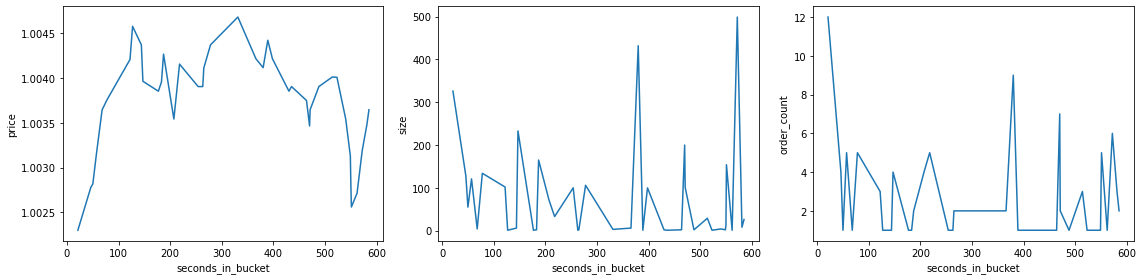

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()
cols = ['price', 'size', 'order_count']
for i in range(len(cols)):
    ax = axs[i]
    sns.lineplot(x='seconds_in_bucket', y=cols[i], data=trade_example, ax=ax)
plt.tight_layout()

In [6]:
# Calculate WAP
book_example['wap'] = (book_example['bid_price1']*book_example['ask_size1'] + 
                           book_example['ask_price1']*book_example['bid_size1']) / (
                               book_example['bid_size1'] + book_example['ask_size1'])

Text(0.5, 1.0, 'WAP of stock_id_0, time_id_5')

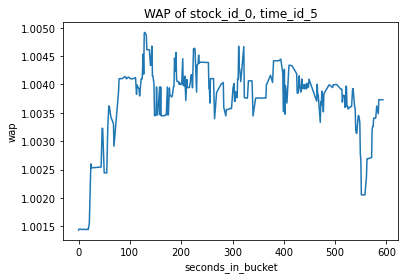

In [7]:
cols = ['wap']
ax = sns.lineplot(x='seconds_in_bucket', y='wap', data=book_example)
ax.set_title('WAP of stock_id_0, time_id_5')

In [8]:
# Calculate Log return

def log_return(list_stock_price):
    return np.log(list_stock_price).diff()

book_example.loc[:, 'log_return'] = log_return(book_example['wap'])
book_example = book_example[~book_example['log_return'].isnull()]

Text(0.5, 1.0, 'Log returnof stock_id_0, time_id_5')

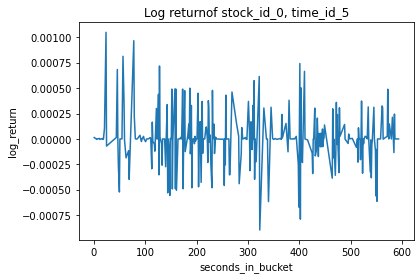

In [9]:
ax = sns.lineplot(x='seconds_in_bucket', y='log_return', data=book_example)
ax.set_title('Log returnof stock_id_0, time_id_5')

In [10]:
# Calculate Realized Volatlity over 10 minutes of 5 -time-id data.
# ================================================================================
# 
# per time id, containts about 600 time series data (secounds) of Buid, Ask, Price.
# Calculate WAP and Log return of each time (secounds) -> 600 each WAP & Log return is generated here.
# Calculate Realized Volatility over 600 time series. -> one RV is calculated here and this is the past value (not target value)
# You can also use this value for input?.


def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

realized_vol = realized_volatility(book_example['log_return'])
print(f'Realized volatility for stock_id 0 on time_id 5 is {realized_vol}')

Realized volatility for stock_id 0 on time_id 5 is 0.004499364172786558


In [18]:
for i in range(1, 4):
    for j in range(i+1, 4):
        print(i, j)

1 2
1 3
2 3
